In [1]:
import pandas  as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
weather = pd.read_csv('.ipynb_checkpoints\weatherAUS.csv')
# now that we imported the data lets grab a peek and understand all are columns
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print(f'The number of rows are {weather.shape[0] } and the number of columns are {weather.shape[1]}')

The number of rows are 145460 and the number of columns are 23


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
weather['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
weather['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.0
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0


In [7]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
(weather.isnull().sum()/len(weather))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [9]:
weather['RainToday']=weather['RainToday'].fillna(weather['RainToday'].mode()[0])
weather['RainTomorrow']=weather['RainTomorrow'].fillna(weather['RainTomorrow'].mode()[0])
#Filling the missing values for continuous variables with mode
weather['WindDir9am'] = weather['WindDir9am'].fillna(weather['WindDir9am'].mode()[0])
weather['WindGustDir'] = weather['WindGustDir'].fillna(weather['WindGustDir'].mode()[0])
weather['WindDir3pm'] = weather['WindDir3pm'].fillna(weather['WindDir3pm'].mode()[0])

In [10]:
weather['MinTemp']=weather['MinTemp'].fillna(weather['MinTemp'].mean())
weather['MaxTemp']=weather['MaxTemp'].fillna(weather['MaxTemp'].mean())
weather['Rainfall']=weather['Rainfall'].fillna(weather['Rainfall'].mean())
weather['Evaporation']=weather['Evaporation'].fillna(weather['Evaporation'].mean())
weather['Sunshine']=weather['Sunshine'].fillna(weather['Sunshine'].mean())
weather['WindGustSpeed']=weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean())
weather['WindSpeed9am']=weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].mean())
weather['WindSpeed3pm']=weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].mean())
weather['Humidity9am']=weather['Humidity9am'].fillna(weather['Humidity9am'].mean())
weather['Humidity3pm']=weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean())
weather['Pressure9am']=weather['Pressure9am'].fillna(weather['Pressure9am'].mean())
weather['Pressure3pm']=weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean())
weather['Cloud9am']=weather['Cloud9am'].fillna(weather['Cloud9am'].mean())
weather['Cloud3pm']=weather['Cloud3pm'].fillna(weather['Cloud3pm'].mean())
weather['Temp9am']=weather['Temp9am'].fillna(weather['Temp9am'].mean())
weather['Temp3pm']=weather['Temp3pm'].fillna(weather['Temp3pm'].mean())

In [11]:
(weather.isnull().sum()/len(weather))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

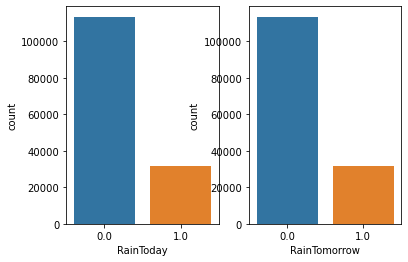

<Figure size 1440x1440 with 0 Axes>

In [12]:
fig,ax =plt.subplots(1,2)

plt.figure(figsize=(20,20))
sns.countplot(data=weather,x='RainToday',ax=ax[0])
sns.countplot(data=weather,x='RainTomorrow',ax=ax[1])

<AxesSubplot:>

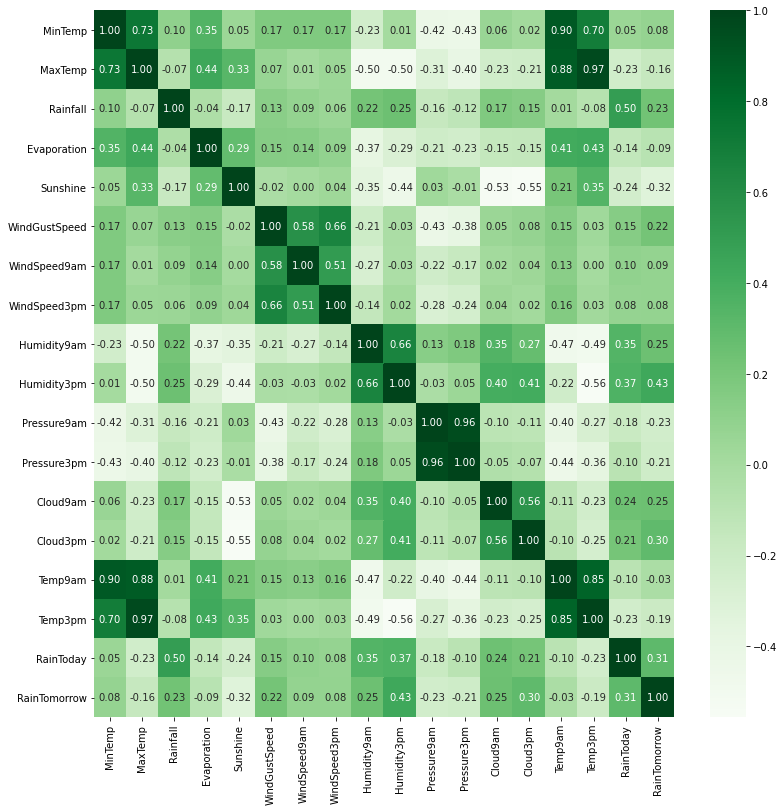

In [13]:
plt.figure(figsize=(13,13))
sns.heatmap(weather.corr(), cmap = 'Greens', annot=True, fmt=".2f")

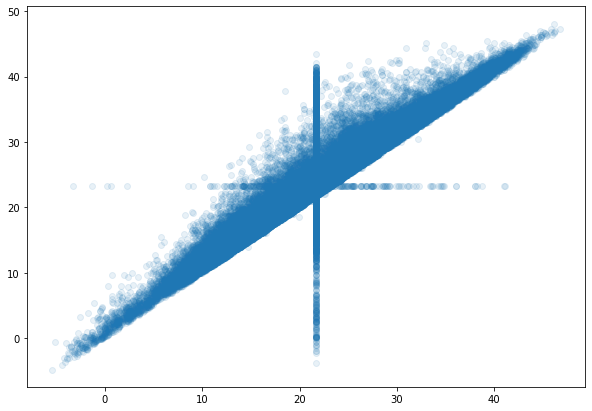

In [14]:
fig = plt.figure(figsize = (10,7))
plt.scatter(weather['Temp3pm'], weather['MaxTemp'], alpha = 0.1)

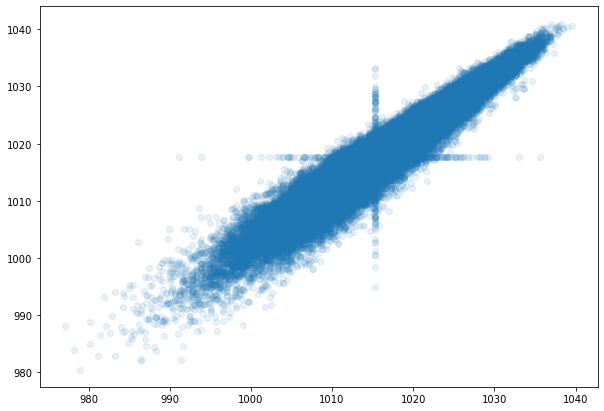

In [15]:
fig = plt.figure(figsize = (10,7))
plt.scatter(weather['Pressure3pm'], weather['Pressure9am'], alpha = 0.1)

In [16]:
weather = weather.drop(['Temp3pm'], axis = 1)
weather = weather.drop(['Pressure9am'], axis = 1)
weather = weather.drop(['Date'], axis = 1) #maybe?

# maybe drop more colls

In [17]:

le = preprocessing.LabelEncoder()
weather['Location'] = le.fit_transform(weather['Location'])
weather['WindDir9am'] = le.fit_transform(weather['WindDir9am'])
weather['WindDir3pm'] = le.fit_transform(weather['WindDir3pm'])
weather['WindGustDir'] = le.fit_transform(weather['WindGustDir'])
weather.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.1,8.000000,4.50993,16.9,0.0,0.0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1007.8,4.447461,4.50993,17.2,0.0,0.0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1008.7,4.447461,2.00000,21.0,0.0,0.0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1012.8,4.447461,4.50993,18.1,0.0,0.0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1006.0,7.000000,8.00000,17.8,0.0,0.0
5,2,14.6,29.7,0.2,5.468232,7.611178,14,56.0,13,13,19.0,24.0,55.0,23.0,1005.4,4.447461,4.50993,20.6,0.0,0.0
6,2,14.3,25.0,0.0,5.468232,7.611178,13,50.0,12,13,20.0,24.0,49.0,19.0,1008.2,1.000000,4.50993,18.1,0.0,0.0
7,2,7.7,26.7,0.0,5.468232,7.611178,13,35.0,10,13,6.0,17.0,48.0,19.0,1010.1,4.447461,4.50993,16.3,0.0,0.0
8,2,9.7,31.9,0.0,5.468232,7.611178,6,80.0,9,7,7.0,28.0,42.0,9.0,1003.6,4.447461,4.50993,18.3,0.0,1.0
9,2,13.1,30.1,1.4,5.468232,7.611178,13,28.0,8,10,15.0,11.0,58.0,27.0,1005.7,4.447461,4.50993,20.1,1.0,0.0


In [18]:
x = weather.drop(['RainTomorrow'], axis = 1)
y = weather['RainTomorrow']



In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)
# test size was 0.2

In [20]:
z = X_train.values #returns a numpy array
min_max_scaler = MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
X_train = pd.DataFrame(z_scaled)

z = X_test.values #returns a numpy array
z_scaled = min_max_scaler.fit_transform(z)
X_test = pd.DataFrame(z_scaled)
X_train.head()
# X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.770833,0.469340,0.476371,0.000000,0.012414,0.648276,0.866667,0.224806,0.866667,0.133333,0.169231,0.126437,0.67,0.51,0.812800,0.111111,0.125000,0.415612,0.0
1,0.354167,0.466981,0.491493,0.000000,0.037712,0.524909,0.666667,0.325581,0.666667,0.666667,0.200000,0.298851,0.55,0.39,0.610494,0.777778,1.000000,0.476793,0.0
2,0.583333,0.542453,0.695652,0.000000,0.092414,0.931034,0.133333,0.286822,0.133333,0.000000,0.184615,0.103448,0.30,0.14,0.592000,0.333333,0.000000,0.622363,0.0
3,0.729167,0.415094,0.438563,0.014555,0.009655,0.062069,0.866667,0.341085,0.866667,1.000000,0.238462,0.275862,0.84,0.57,0.571200,0.888889,0.500000,0.407173,1.0
4,0.937500,0.478774,0.495274,0.000000,0.037712,0.524909,0.933333,0.496124,0.933333,0.933333,0.384615,0.402299,0.46,0.24,0.435200,0.494162,0.563741,0.485232,0.0


In [21]:
dummyModel = DummyClassifier(strategy="stratified")
dummyModel.fit(X_train, y_train)
predictionsDummy = dummyModel.predict(X_test)

accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
accuracyDummy

0.6562628901416196

In [22]:
modelLogReg = LogisticRegression(max_iter=500)
modelLogReg.fit(X_train, y_train)
predictionsLogReg = modelLogReg.predict(X_test)
accuracyLogReg = modelLogReg.score(X_test, y_test)

conf = confusion_matrix(y_test, predictionsLogReg)
print ("The accuracy of Logistic Regression is : ", accuracyLogReg*100, "%")
print(accuracyLogReg)
# print("F1 score for logistic regression is :",f1_score(y_test, predictionsLogReg,)*100, "%")

The accuracy of Logistic Regression is :  83.89935377423346 %
0.8389935377423346


<AxesSubplot:>

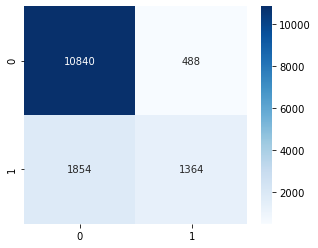

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsLogReg), cmap = "Blues", annot=True, fmt = '.0f')

In [24]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = i).mean()
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)

accuracy = cross_val_score(modelLogReg, X_train, y_train, cv = 11).mean()
maxi = 11
max = accuracy
print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)


# print("Best index: 11 
# cross_val_score of index 11 : 0.8424691109678968")

Best index: 11 
cross_val_score of index 11 : 0.8424996647942447


In [27]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(1,20):
#     modelKNN = KNeighborsClassifier(n_neighbors = i, weights='distance')
#     modelKNN.fit(X_train, y_train)
#     accuracy = modelKNN.score(X_test, y_test)
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print(maxi, "  ", max)

modelKNN = KNeighborsClassifier(n_neighbors = 12, weights='distance')
modelKNN.fit(X_train, y_train)
accuracy = modelKNN.score(X_test, y_test)
print("12,",accuracy)

12, 0.836999862505156


In [31]:
modelKNN = KNeighborsClassifier(n_neighbors = 9, weights='distance')
modelKNN.fit(X_train, y_train)
predictionsKNN = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN) #Resturns the same value as the score() method in the
#previous cell
accuracyKNN

conf = confusion_matrix(y_test, predictionsKNN)
print ("The accuracy of Logistic Regression is : ", accuracyKNN*100, "%")
print(accuracyLogReg)
# print("F1 score for logistic regression is :",f1_score(y_test, predictionsKNN,)*100, "%")

The accuracy of Logistic Regression is :  83.50061872679775 %
0.8389935377423346


<AxesSubplot:>

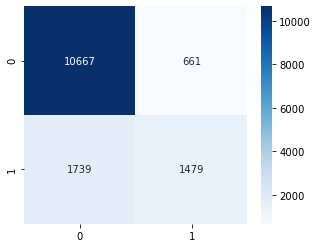

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predictionsKNN), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
maxi = 1 #saving the index of the highest score
max = 0 #saving the value of the highest score
# for i in range(2,20):
#     accuracy = cross_val_score(modelKNN, X_train, y_train, cv = i).mean()
#     if (accuracy > max):
#         maxi = i
#         max = accuracy
# print('Best index:', maxi, "\ncross_val_score of index", maxi, ':', max)

accuracy = cross_val_score(modelKNN, X_train, y_train, cv = 14).mean()
print("14,",accuracy)

asd 5
